In [ ]:
import pandas as pd
import numpy as np
import itertools
from itertools import cycle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, accuracy_score, confusion_matrix
from scipy import interp
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('./edm_tracks.csv')

genres = ['house',
          'techno',
          'trance',
          'dubstep',
          'dnb',
          'hardstyle']

features = ['acousticness',
            'instrumentalness',
            'speechiness',
            'danceability',
            'liveness',
            'valence',
            'energy',
            'loudness',
            'tempo',
            'duration_ms']

print(df.head())

X = df[features].copy()
y = LabelEncoder().fit_transform(df['genre'])
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

model = Sequential()
model.add(Dense(units=256, activation='tanh', input_shape=(10,)))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

prob = model.predict(X_test)

   Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0           0         0.368   0.792    7    -6.804     1       0.0396   
1           1         0.540   0.897    0    -3.246     1       0.0290   
2           2         0.608   0.673    8    -7.360     1       0.0319   
3           3         0.555   0.574    5    -7.611     0       0.0396   
4           4         0.567   0.839    1    -3.382     1       0.0679   

   acousticness  instrumentalness  liveness  valence    tempo            type  \
0       0.00186          0.031400    0.3740   0.0794  122.818  audio_features   
1       0.11800          0.000000    0.1710   0.4280  127.954  audio_features   
2       0.10700          0.032600    0.0857   0.2700  125.988  audio_features   
3       0.02390          0.000000    0.0781   0.1940  127.967  audio_features   
4       0.06610          0.000386    0.5210   0.3350  127.928  audio_features   

                       id                                   uri  \
0  3TeV

In [ ]:
nn = np.argmax(prob, axis=-1)
nn = one_hot_encoder(y_test, len(nn), len(genres))
pdt = [genres[i] for i in np.where(nn==1)[1]]
# pdt

In [ ]:
convert = [3, 4, 5, 1, 0 ,2]
testl = [{'danceability': 0.361, 'energy': 0.905, 'key': 7, 'loudness': -2.776, 'mode': 1, 'speechiness': 0.278, 'acousticness': 0.0149, 'instrumentalness': 0.000202, 'liveness': 0.156, 'valence': 0.224, 'tempo': 155.772, 'type': 'audio_features', 'id': '4Lg2QCQoBPVEYMIZZ1oKcH', 'uri': 'spotify:track:4Lg2QCQoBPVEYMIZZ1oKcH', 'track_href': 'https://api.spotify.com/v1/tracks/4Lg2QCQoBPVEYMIZZ1oKcH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Lg2QCQoBPVEYMIZZ1oKcH', 'duration_ms': 286452, 'time_signature': 4}]
testdf = pd.DataFrame(testl)
testdf = testdf[features].copy()
print(testdf.head())
testdf = pd.DataFrame(scaler.transform(testdf), columns = X.columns)
testp = model.predict(testdf)
testa = np.argmax(testp, axis=-1)
g = convert.index(testa[0])
genres[g]
# testa
# testa = one_hot_encoder([3], len(testa), len(genres))
# testpdt = [genres[i] for i in np.where(testa==1)[1]]
# testpdt
# print(list(y))

   acousticness  instrumentalness  speechiness  danceability  liveness  \
0        0.0149          0.000202        0.278         0.361     0.156   

   valence  energy  loudness    tempo  duration_ms  
0    0.224   0.905    -2.776  155.772       286452  


'hardstyle'

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [ ]:
def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(genres))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), normalize=False, classes=genres)

Test Set Accuracy =  0.81
Test Set F-score =  0.81
ROC AUC = 0.970
Confusion matrix, without normalization
[[199   1   0   0   0   0]
 [ 10 130  26  30   2   2]
 [  0  20 176   0   0   4]
 [  0   0   0 182  15   3]
 [  0   4   1  46 123  26]
 [  0   4   0   9  24 163]]


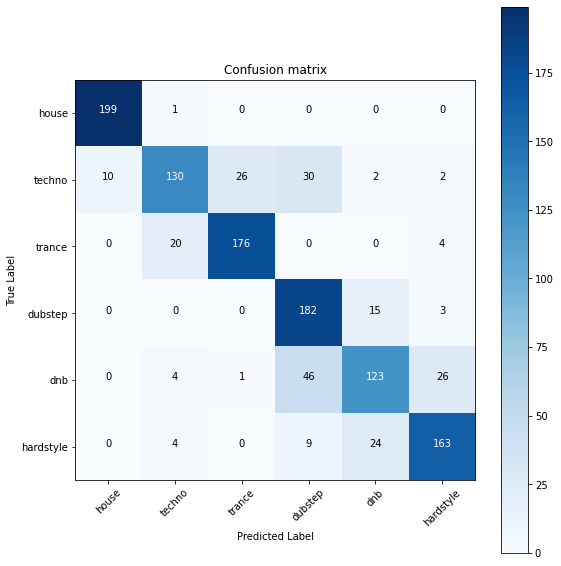

In [ ]:
display_results(y_test, prob, cm=True)

Test Set Accuracy =  0.82
Test Set F-score =  0.82
ROC AUC = 0.974
Confusion matrix, without normalization
[[796   3   1   0   0   0]
 [ 40 519 114  99  11  17]
 [  1  72 709   0   0  18]
 [  0   0   0 745  50   5]
 [  0   9   4 174 518  95]
 [  0  11   1  59  76 653]]


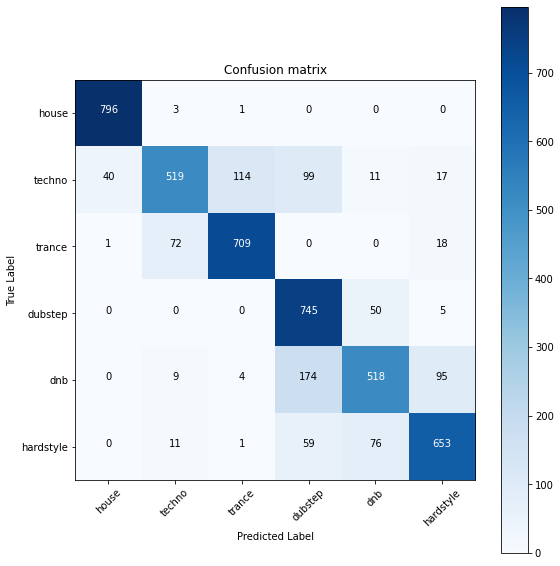

In [ ]:
ANN_Prob_Train = model.predict(X_train)
display_results(y_train, ANN_Prob_Train, cm=True)

Test Set Accuracy =  0.74
Test Set F-score =  0.73
ROC AUC = 0.937
Confusion matrix, without normalization
[[200   0   0   0   0   0]
 [ 22 106  34  24   9   5]
 [  0  45 138   0   0  17]
 [  0   1   0 172  24   3]
 [  0   5   5  42 120  28]
 [  0   5   7  14  27 147]]


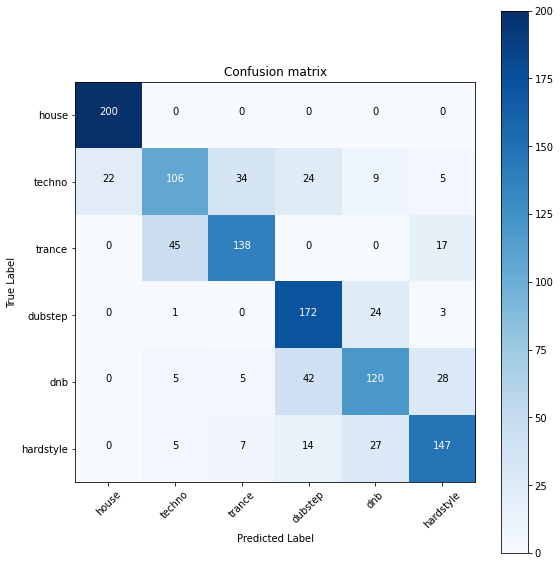

In [ ]:
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)
svm_probs = svm.predict_proba(X_test)
display_results(y_test, svm_probs, cm=True)

Test Set Accuracy =  0.73
Test Set F-score =  0.72
ROC AUC = 0.934
Confusion matrix, without normalization
[[797   2   1   0   0   0]
 [ 98 401 166  90  31  14]
 [  1 159 562   0   3  75]
 [  0   2   0 655 125  18]
 [  0  20  22 157 490 111]
 [  0  15  33  64  94 594]]


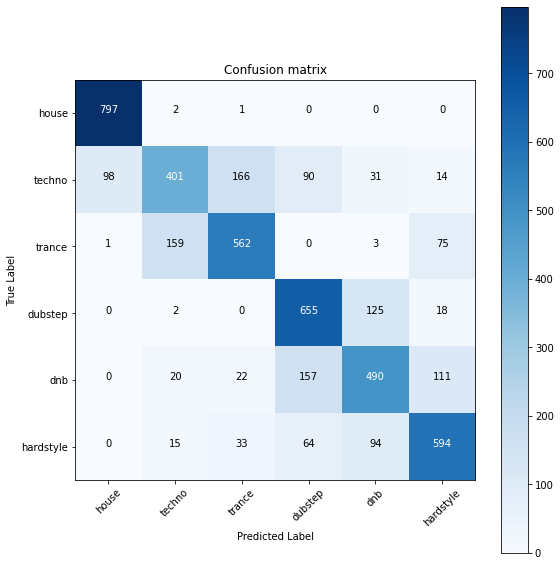

In [ ]:
SVM_Prob_Train = svm.predict_proba(X_train)
display_results(y_train, SVM_Prob_Train, cm=True)

Test Set Accuracy =  0.83
Test Set F-score =  0.83
ROC AUC = 0.974
Confusion matrix, without normalization
[[200   0   0   0   0   0]
 [ 10 135  27  22   3   3]
 [  0  14 183   0   0   3]
 [  0   0   0 177  22   1]
 [  0   7   1  29 134  29]
 [  0   4   1   7  21 167]]


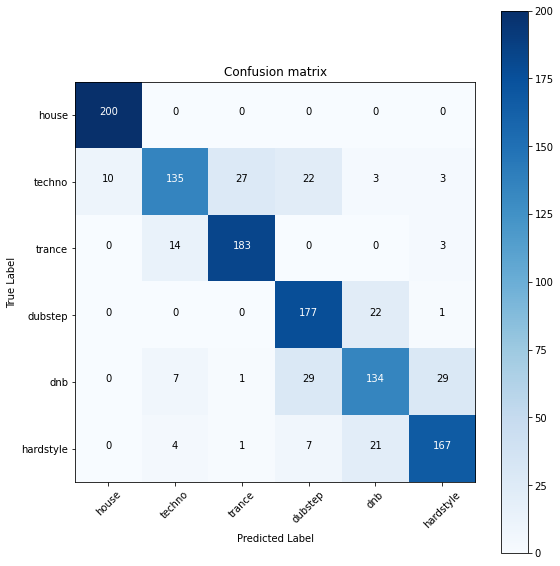

In [ ]:
rf = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf.fit(X_train, y_train) 
rf_probs = rf.predict_proba(X_test)
display_results(y_test, rf_probs, cm=True)

Test Set Accuracy =  0.99
Test Set F-score =  0.99
ROC AUC = 1.000
Confusion matrix, without normalization
[[800   0   0   0   0   0]
 [  3 793   0   2   1   1]
 [  0   2 797   0   1   0]
 [  0   0   0 796   4   0]
 [  0   0   0   5 789   6]
 [  0   0   0   0   2 798]]


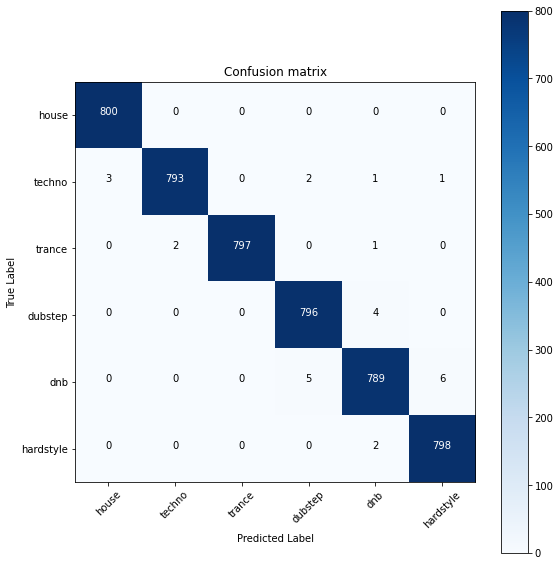

In [ ]:
RF_Prob_Train = rf.predict_proba(X_train)
display_results(y_train, RF_Prob_Train, cm=True)

[Text(0.733261151535595, 0.975, 'tempo <= 0.556\ngini = 0.833\nsamples = 3038\nvalue = [813, 776, 797, 781, 803, 830]\nclass = hardstyle'),
 Text(0.5027597741583141, 0.925, 'loudness <= 0.662\ngini = 0.799\nsamples = 2472\nvalue = [2, 689, 797, 781, 803, 830]\nclass = hardstyle'),
 Text(0.22527145977897714, 0.875, 'liveness <= 0.127\ngini = 0.707\nsamples = 1071\nvalue = [0, 116, 143, 195, 591, 645]\nclass = hardstyle'),
 Text(0.1224620920071961, 0.825, 'danceability <= 0.633\ngini = 0.682\nsamples = 626\nvalue = [0, 60, 71, 102, 434, 308]\nclass = dnb'),
 Text(0.06103829349781547, 0.775, 'energy <= 0.583\ngini = 0.722\nsamples = 302\nvalue = [0, 50, 60, 50, 96, 200]\nclass = hardstyle'),
 Text(0.02313030069390902, 0.725, 'duration_ms <= 0.24\ngini = 0.77\nsamples = 68\nvalue = [0, 32, 8, 26, 22, 17]\nclass = techno'),
 Text(0.01233616037008481, 0.675, 'danceability <= 0.484\ngini = 0.557\nsamples = 31\nvalue = [0, 23, 1, 24, 1, 1]\nclass = dubstep'),
 Text(0.008224106913389874, 0.625,

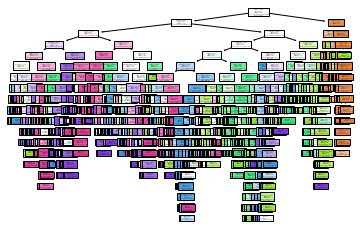

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
# export_graphviz(rf.estimators_[0],
#                 feature_names=features,
#                 filled=True,
#                 rounded=True)
tree.plot_tree(rf.estimators_[0], 
                   feature_names=features,  
                   class_names=genres,
                   filled=True)

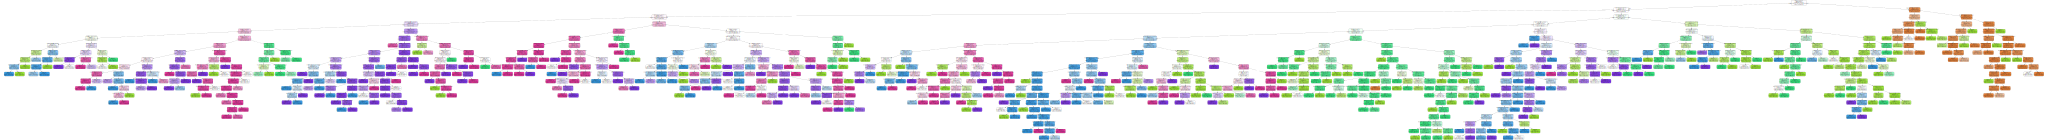

In [ ]:
import graphviz
dot_data = tree.export_graphviz(rf.estimators_[0],
                feature_names=features,
                class_names=genres,
                filled=True,
                rounded=True)
graph = graphviz.Source(dot_data, format="png") 
graph
# graph.render("decision_tree_graphivz1")